Activation Function
=======================
* Y = f(x) = Wx，y是預測值，x是輸入值，為一個線性方程式
* 在現實當中很多問題通常都是非線性的，而 Activation Function 就是將線性轉成非線性用的，也就是 Y = AF(f(x)) 會變成非線性的

In [2]:
import torch
import torch.nn.functional as F 
from torch.autograd import Variable

x = torch.linspace(-5, 5, 200)  # x data (tensor), shape=(100, 1)
x = Variable(x)

print(x)

tensor([-5.0000, -4.9497, -4.8995, -4.8492, -4.7990, -4.7487, -4.6985, -4.6482,
        -4.5980, -4.5477, -4.4975, -4.4472, -4.3970, -4.3467, -4.2965, -4.2462,
        -4.1960, -4.1457, -4.0955, -4.0452, -3.9950, -3.9447, -3.8945, -3.8442,
        -3.7940, -3.7437, -3.6935, -3.6432, -3.5930, -3.5427, -3.4925, -3.4422,
        -3.3920, -3.3417, -3.2915, -3.2412, -3.1910, -3.1407, -3.0905, -3.0402,
        -2.9899, -2.9397, -2.8894, -2.8392, -2.7889, -2.7387, -2.6884, -2.6382,
        -2.5879, -2.5377, -2.4874, -2.4372, -2.3869, -2.3367, -2.2864, -2.2362,
        -2.1859, -2.1357, -2.0854, -2.0352, -1.9849, -1.9347, -1.8844, -1.8342,
        -1.7839, -1.7337, -1.6834, -1.6332, -1.5829, -1.5327, -1.4824, -1.4322,
        -1.3819, -1.3317, -1.2814, -1.2312, -1.1809, -1.1307, -1.0804, -1.0302,
        -0.9799, -0.9296, -0.8794, -0.8291, -0.7789, -0.7286, -0.6784, -0.6281,
        -0.5779, -0.5276, -0.4774, -0.4271, -0.3769, -0.3266, -0.2764, -0.2261,
        -0.1759, -0.1256, -0.0754, -0.02

relu
--------
* Rectified Linear Units
* y = max(0, x)
* Relu 計算量小，只需要判斷輸入是否大於0，不用指數運算，速度快

sigmoid
---------
* 通常被用於分類問題的網路模型中，會輸出範圍介於[0, 1]
* y = 1 / (1 + e^-x)

tanh
-------
* TanHyperbolic(tanh)函數又稱作雙曲正切函數
* y = (e^x - e^-x) / (e^x + e^-x)


softplus
---------
* y = log(1 + e^x)
* softplus可以看作是ReLu的平滑

softplus和ReLu相比於Sigmoid的優點
-----------------------------------------
* 採用sigmoid等函數，算激活函數時（指數運算），計算量大，反向傳播求誤差梯度時，求導涉及除法，計算量相對大，而採用Relu激活函數，整個過程的計算量節省很多
* 對於深層網絡，sigmoid函數反向傳播時，很容易就會出現梯度消失的情況（在sigmoid接近飽和區[-4, +4]之外時，變換太緩慢，導數趨於0，這種情況會造成信息丟失），從而無法完成深層網絡的訓練
* Relu會使一部分神經元的輸出為0，這樣就造成了網絡的稀疏性，並且減少了參數的相互依存關係，緩解了過擬合問題的發生
* softplus和ReLu更加接近腦神經元的激活模型 (生物事實：全有全無律 (all or none law))

例子
-------

In [5]:
x_np = x.data.numpy() 

y_relu = F.relu(x).data.numpy()
y_sigmoid = F.sigmoid(x).data.numpy()
y_tanh = F.tanh(x).data.numpy()
y_softplus = F.softplus(x).data.numpy()

C:\ProgramData\Anaconda3\envs\PytorchCuda\lib\site-packages\torch\nn\functional.py:1350: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
C:\ProgramData\Anaconda3\envs\PytorchCuda\lib\site-packages\torch\nn\functional.py:1339: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


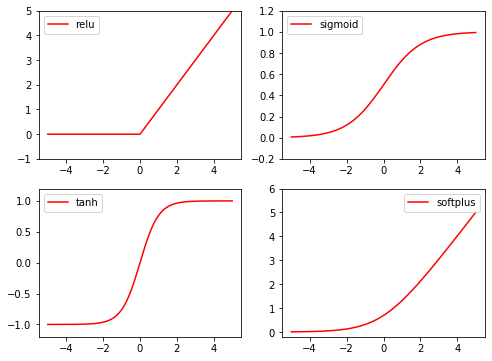

In [6]:
import matplotlib.pyplot as plt  # python 的可视化模块, 我有教程 (https://morvanzhou.github.io/tutorials/data-manipulation/plt/)

plt.figure(1, figsize=(8, 6))
plt.subplot(221)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_np, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

plt.show()